In [1]:
import numpy as np
import pandas as pd
import pulp
from scipy.spatial import distance_matrix
import itertools
import matplotlib.pyplot as plt

customer_count = 10 #顧客数（id=0はdepot）
vehicle_capacity = 50 #車両容量

np.random.seed(seed=32)

#各顧客のx,y座標をDataFrameとして作成
df = pd.DataFrame({"x":np.random.randint(0,100, customer_count), 
                   "y":np.random.randint(0, 100, customer_count), 
                   "demand":np.random.randint(5, 20, customer_count)})

#id=0はdepotなので，demand=0にする
df.iloc[0].x = 50
df.iloc[0].y = 50
df.iloc[0].demand = 0

#コストとしてノード間の直線距離を求める

#修正前
#cost = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index).values
#修正後
cost = pd.DataFrame(distance_matrix(df.loc[:,["x","y"]].values, df.loc[:,["x","y"]].values), index=df.index, columns=df.index).values

df.head()

,x,y,demand
0,50,50,0
1,43,4,15
2,5,11,9
3,54,81,7
4,62,3,9


$$ \sum \sum_{2}^{1}dalx1x

In [32]:

# 問題の宣言
problem = pulp.LpProblem("CVRP", pulp.LpMaximize)

# 決定変数
x = [[pulp.LpVariable("x%s_%s"%(i,j), cat="Binary") if i != j else None for j in range(customer_count)] for i in range(customer_count)]

# 目的関数
problem += pulp.lpSum(x[i][j] if i != j else 0
                        for j in range(customer_count) for i in range (customer_count))

# problem += pulp.lpSum(df.demand[j] * x[i][j] if i != j else 0 for i in range(customer_count) for j in range (1,customer_count))

# 制約
# (2)式，各顧客の場所に訪れるのは1台の車両で1度である
for j in range(1, customer_count):
    problem += pulp.lpSum(x[i][j] if i != j else 0 for i in range(customer_count)) <= 1 

#(3)式, depotから出発して，depotに戻ってくる

# デポを出発した運搬車が必ず 1つの顧客から訪問を開始することを保証する制約条件
problem += pulp.lpSum(x[0][j] for j in range(1,customer_count)) == 1
# 必ず 1 つの顧客から運搬車がデポへ到着すること保証する制約条件
problem += pulp.lpSum(x[i][1] for i in range(customer_count)) == 1
problem += pulp.lpSum(x[1][j] for j in range(customer_count)) == 0

problem += pulp.lpSum(x[i][0] for i in range(1,customer_count)) == 0

#(4)式, ある顧客の所に来る車両数と出る車両数が同じa

for j in range(2,customer_count):
    problem += pulp.lpSum(x[i][j] if i != j else 0 for i in range(customer_count)) -  pulp.lpSum(x[j][i] for i in range(customer_count)) == 0

#(5)式, 各車両において最大容量を超えない

problem += pulp.lpSum(df.demand[j] * x[i][j] if i != j else 0 for i in range(customer_count) for j in range (1,customer_count)) <= vehicle_capacity 


#(6)式, 部分巡回路除去制約
subtours = []
for i in range(2,customer_count):
        subtours += itertools.combinations(range(1,customer_count), i)

for s in subtours:
    problem += pulp.lpSum(x[i][j] if i !=j else 0 for i, j in itertools.permutations(s,2)) <= len(s) - 1


if problem.solve() == 1:
    print('目的関数値:', pulp.value(problem.objective))
    print(problem)

目的関数値: 5.0
CVRP:
MAXIMIZE
1*x0_1 + 1*x0_2 + 1*x0_3 + 1*x0_4 + 1*x0_5 + 1*x0_6 + 1*x0_7 + 1*x0_8 + 1*x0_9 + 1*x1_0 + 1*x1_2 + 1*x1_3 + 1*x1_4 + 1*x1_5 + 1*x1_6 + 1*x1_7 + 1*x1_8 + 1*x1_9 + 1*x2_0 + 1*x2_1 + 1*x2_3 + 1*x2_4 + 1*x2_5 + 1*x2_6 + 1*x2_7 + 1*x2_8 + 1*x2_9 + 1*x3_0 + 1*x3_1 + 1*x3_2 + 1*x3_4 + 1*x3_5 + 1*x3_6 + 1*x3_7 + 1*x3_8 + 1*x3_9 + 1*x4_0 + 1*x4_1 + 1*x4_2 + 1*x4_3 + 1*x4_5 + 1*x4_6 + 1*x4_7 + 1*x4_8 + 1*x4_9 + 1*x5_0 + 1*x5_1 + 1*x5_2 + 1*x5_3 + 1*x5_4 + 1*x5_6 + 1*x5_7 + 1*x5_8 + 1*x5_9 + 1*x6_0 + 1*x6_1 + 1*x6_2 + 1*x6_3 + 1*x6_4 + 1*x6_5 + 1*x6_7 + 1*x6_8 + 1*x6_9 + 1*x7_0 + 1*x7_1 + 1*x7_2 + 1*x7_3 + 1*x7_4 + 1*x7_5 + 1*x7_6 + 1*x7_8 + 1*x7_9 + 1*x8_0 + 1*x8_1 + 1*x8_2 + 1*x8_3 + 1*x8_4 + 1*x8_5 + 1*x8_6 + 1*x8_7 + 1*x8_9 + 1*x9_0 + 1*x9_1 + 1*x9_2 + 1*x9_3 + 1*x9_4 + 1*x9_5 + 1*x9_6 + 1*x9_7 + 1*x9_8 + 0
SUBJECT TO
_C1: x0_1 + x2_1 + x3_1 + x4_1 + x5_1 + x6_1 + x7_1 + x8_1 + x9_1 <= 1

_C2: x0_2 + x1_2 + x3_2 + x4_2 + x5_2 + x6_2 + x7_2 + x8_2 + x9_2 <= 1

_C3: x0

0 4
2 5
3 1
4 2
5 3


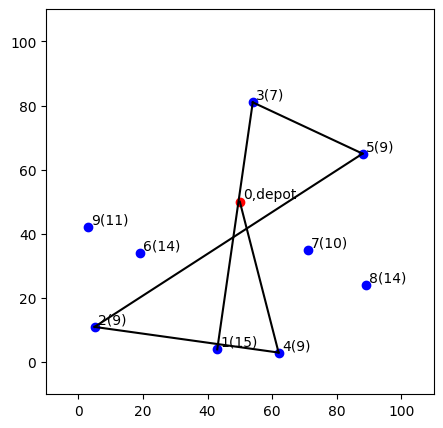

In [33]:

plt.figure(figsize=(5,5))
for i in range(customer_count):    
    if i == 0:
        plt.scatter(df.x[i], df.y[i], c='r')
        plt.text(df.x[i]+1, df.y[i]+1, str(i)+",depot")
    else:
        plt.scatter(df.x[i], df.y[i], c='b')
        plt.text(df.x[i]+1, df.y[i]+1, str(i)+"("+str(df.demand[i])+")")
plt.xlim([-10, 110])
plt.ylim([-10, 110])


for i in range(customer_count):
    for j in range(customer_count):
        if i != j and pulp.value(x[i][j]) == 1:
            print(i,j)
            plt.plot([df.x[i], df.x[j]], [df.y[i], df.y[j]], c="black")